In [ ]:
import pandas as pd
import numpy as np

ad_data = pd.read_csv("D:\BookExample_Python\Lecture03\Tranning\Backup\eda_data_files\\naver_ad.csv")
ad_data

#ad_data.drop([0,1,2], axis=0, inplace= True)
#ad_data[ad_data['키워드'] == '-']
ad_data = ad_data.loc[ad_data['키워드'] != '-']
ad_data.reset_index(drop=True)

In [ ]:
# 노출수 = 사람들에게 광고가 보여지는 횟수
# 클릭률 = 노출수 대비 클릭한 숫자
# 클릭비용(CPC) 클릭당 지출 비용...

# 중점적으로 관리할 키워드를 추출 : 노출수가 높은 키워드, 클릭수가 높은 키워드, 클릭률이 높은 키워드, 클릭비용이 낮은 키워드
# 상위 20%를 추출하시오

# 노출수가 높은 키워드 
express_keyword = ad_data.sort_values('노출수',ascending=False).head(int(len(ad_data) * 0.1))[['키워드', '노출수']]
express_keyword.reset_index(drop=True)

In [ ]:
# 클릭수가 높은 키워드 
click_keyword = ad_data.sort_values('클릭수',ascending=False).head(int(ad_data['키워드'].count() * 0.1))[['키워드', '클릭수']]
click_keyword.reset_index(drop=True)

In [ ]:
# 클릭률이 높은 키워드 
ad_data['클릭률'] = ad_data['클릭수'] / ad_data['노출수']
click_rate_keyword = ad_data.sort_values('클릭률',ascending=False).head(int(ad_data['키워드'].count() * 0.1))[['키워드','클릭률']]
click_rate_keyword.reset_index(drop=True)


In [ ]:
# 클릭비용이 낮은 키워드
ad_data['클릭비용(cpc)'] = ad_data['총비용(VAT포함,원)'] / ad_data['클릭수']
click_cost_keyword = ad_data.sort_values('클릭비용(cpc)',ascending=False).head(int(ad_data['키워드'].count() * 0.1))[['키워드','클릭비용(cpc)']]
click_cost_keyword.reset_index(drop=True)

In [2]:
import pandas as pd
import numpy as np 

pd.options.display.float_format = '{:.1f}'.format

# 
kobis = pd.read_csv('D:\BookExample_Python\Lecture03\Tranning\Backup\eda_data_files\KOBIS_개봉일람_2019-10-26.csv',skiprows=5)
kobis.columns = ['순번','영화명','감독','제작사','수입사','배급사','개봉일','영화유형','영화형태','국적','전국스크린수','매출액','관객수','서울매출액','서울관객수','장르','등급','영화구분']
kobis.drop([0], inplace=True)

kobis['개봉일'] = pd.to_datetime(kobis['개봉일'])
kobis['개봉년'] = kobis['개봉일'].dt.year
kobis['개봉달'] = kobis['개봉일'].dt.month

#kobis['전국스크린수'] = kobis['전국스크린수'].apply(lambda x : x.replace(',','')).astype('int32')
kobis['순번'] = kobis['전국스크린수'].str.replace(',','').astype('int32')
kobis['전국스크린수'] = kobis['전국스크린수'].str.replace(',','').astype('int32')
kobis['매출액'] = kobis['매출액'].dropna().str.replace(',','').astype('int64')
kobis['관객수'] = kobis['관객수'].dropna().str.replace(',','').astype('int64')
kobis['서울매출액'] = kobis['서울매출액'].dropna().str.replace(',','').astype('int64')
kobis['서울관객수'] = kobis['서울관객수'].dropna().str.replace(',','').astype('int64')

kobis

,순번,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국스크린수,매출액,관객수,서울매출액,서울관객수,장르,등급,영화구분,개봉년,개봉달
1,1587,명량,김한민,(주)빅스톤픽쳐스,NaN,씨제이이앤엠(주),2014-07-30,개봉영화,장편,한국,1587,135748398910.0,17613682,33121225810.0,4163666,사극,15세이상관람가,일반영화,2014.0,7.0
2,1978,극한직업,이병헌,"(주)어바웃필름,영화사 해그림 주식회사,씨제이이앤엠(주)",NaN,씨제이이앤엠(주),2019-01-23,개봉영화,장편,한국,1978,139647979516.0,16264944,31858660536.0,3638287,코미디,15세이상관람가,일반영화,2019.0,1.0
3,1912,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",NaN,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,개봉영화,장편,한국,1912,115698654137.0,14410754,27530825087.0,3346172,판타지,12세이상관람가,일반영화,2017.0,12.0
4,966,국제시장,윤제균,"(주)제이케이필름,씨제이이앤엠(주)",NaN,씨제이이앤엠(주),2014-12-17,개봉영화,장편,한국,966,110828014630.0,14245998,25842519330.0,3233946,드라마,12세이상관람가,일반영화,2014.0,12.0
5,2835,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,2835,122182694160.0,13934592,33577136860.0,3597963,액션,12세이상관람가,일반영화,2019.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19700,0,UFO를 타고 온 외계인 왕자,NaN,NaN,NaN,NaN,1984-01-01,개봉영화,장편,한국,0,0.0,0,0.0,47323,SF,연소자관람가,일반영화,1984.0,1.0
19701,0,W의 비극,김수형,한진흥업주식회사,NaN,NaN,1985-06-09,개봉영화,장편,한국,0,0.0,0,0.0,8624,드라마,연소자관람불가,일반영화,1985.0,6.0
19702,0,X게임,엠마뉴엘 그리센티,NaN,(주)한영필림,NaN,1997-07-05,개봉영화,장편,이탈리아,0,0.0,0,0.0,434,범죄,연소자관람불가,일반영화,1997.0,7.0
19703,0,Y의 체험,이장호,판영화사(주),NaN,NaN,1987-10-03,개봉영화,장편,한국,0,0.0,0,0.0,37520,드라마,고등학생이상관람가,일반영화,1987.0,10.0


In [3]:
# http://www.kobis.or.kr

# 매출액이 사상 최대인 영화는?
kobis[kobis['매출액'].max() == kobis['매출액']]['영화명']
kobis.sort_values('매출액',ascending=False).iloc[0]

2    극한직업
Name: 영화명, dtype: object

In [7]:
# 국가별 영화 매출액 순위..?

kobis_ranking = kobis.groupby(['국적'])['매출액'].mean().sort_values(ascending=False)
kobis_ranking.reset_index(drop=True)

kobis_ranking.head(5)
kobis.groupby('국적')['매출액'].mean().sort_values(ascending=False)


국적
한국         1668195115.1
미국         1330608497.6
벨기에         961789756.9
남아프리카공화국    771217380.0
아이슬란드       404282210.7
               ...     
서독                  0.0
룩셈부르크               0.0
잉글랜드                0.0
유고슬라비아              0.0
아프카니스탄              0.0
Name: 매출액, Length: 74, dtype: float64

<Axes: xlabel='개봉년'>

C:\Users\GJ\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\GJ\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\GJ\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\GJ\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\GJ\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\G

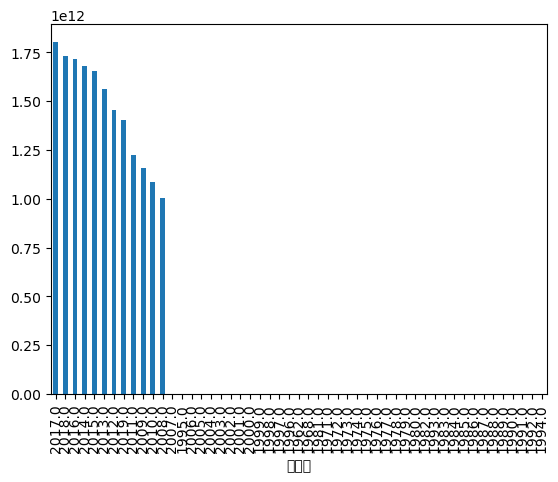

In [20]:

# 연도별 영화 매출합..?
temp = kobis.groupby(kobis['개봉년'])['매출액'].sum().sort_values(ascending=False)
temp.plot(kind='bar')

#string일때
#kobis['개봉일'].apply(lambda x : x.split('-')[0])['매출액'].sum()




In [6]:
# 장르별 매출액 합의 상위 5개 장르..?
temp = kobis.groupby(kobis['장르'])['매출액'].sum().sort_values(ascending=False)
temp.head(5)

장르
액션      5141905060149.0
드라마     3003526529329.0
애니메이션   1482094062301.0
코미디     1375744972964.0
범죄      1257002731569.0
Name: 매출액, dtype: float64

In [21]:
# 장르별 평균 매출액 상위 5개 장르..?
temp = kobis.groupby(kobis['장르'])['매출액'].mean().sort_values(ascending=False)
temp.iloc[:5]


장르
사극     4171186612.7
어드벤처   3840522330.6
판타지    2907302307.0
범죄     2560087029.7
액션     2025169381.7
Name: 매출액, dtype: float64

In [22]:
# 장르별 평균 매출액 하위 5개 장르..?
temp = kobis.groupby(kobis['장르'])['매출액'].mean().sort_values(ascending=True)
temp.iloc[:5]

장르
성인물(에로)       54180.3
공연         53092641.1
기타         95385458.4
멜로/로맨스    233396672.7
다큐멘터리     235242959.7
Name: 매출액, dtype: float64

In [23]:
# 평균 매출액이 높은 감독, 낮은 감독..? 각각 상위 , 하위 3명
temp = kobis.groupby(kobis['감독'])['매출액'].mean().sort_values(ascending=False)
temp.iloc[:3]


감독
크리스 벅,제니퍼 리   82461504400.0
이상근           79142136162.0
이일형           77252755264.0
Name: 매출액, dtype: float64

In [26]:
# 평균 매출액이 높은 감독, 낮은 감독..? 각각 상위 , 하위 3명
temp = kobis.groupby('감독')['매출액'].mean().sort_values(ascending=False)
temp.iloc[-3:]



감독
현남섭   NaN
홍성기   NaN
홍종오   NaN
Name: 매출액, dtype: float64

AttributeError: 'Axes' object has no attribute 'iloc'

C:\Users\GJ\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\GJ\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\GJ\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 45804 (\N{HANGUL SYLLABLE DAL}) missing from current font.
  func(*args, **kwargs)
C:\Users\GJ\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\GJ\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\GJ\

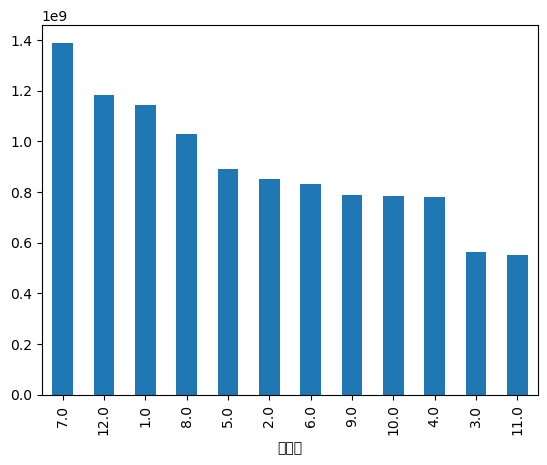

In [28]:
# 평균 매출액이 가장 높은 달은?
temp = kobis.groupby(kobis['개봉달'])['매출액'].mean().sort_values(ascending=False).plot(kind='bar')
temp.iloc[:1]

# 개봉일 dtype = str 일때
# kobis['개봉일'].apply(lambda x:x.split('-')[1])

In [50]:
age_pd = pd.read_csv('D:\BookExample_Python\Lecture03\Tranning\Backup\eda_data_files\\age_pd.csv',encoding='euckr')

age_pd = age_pd.rename(columns={'2019년02월_계_총인구수':'총인구수', '2019년02월_계_연령구간인구수':'연령구간'})

for age in range(101):
    age_pd = age_pd.rename(columns={'2019년02월_계_{}세'.format(age) : '{}세'.format(age)})

age_pd = age_pd.rename(columns={'2019년02월_계_100세 이상' : '100세 이상'})

all_seoul = age_pd.iloc[0]
age_pd['행정구역'].drop([0], axis=0, inplace= True)

#age_pd['행정구역'].apply(lambda x : x.split())



In [ ]:
# 구를 입력받은 후, 해당 구의 연령대별 인구분포를 출력하시오..
borough = input()




In [ ]:


# 구와 연령을 입력받은 후, 해당 구의 해당 연령의 인구수를 출력하시오..
# 연령을 입력받은 후 해당 연령의 인구가 가장 많은 구를 출력하시오..
# 인구수가 가장 많은 구는...?
# 연령대(10대,20대,..50대..100세이상)를 입력받은 후 해당 연령대 인구수가 가장 많은 구를 출력..
# 구를 입력받은 후 해당 구와 연령대별 인구분포가 가장 유사한 구를 출력하시오..
# 서울시에서 인구수가 가장 많은 연령은..?
# 서울시에서 인구수가 가장 많은 연령대(10대,20대,..50대..100세이상)는..?
